Animating oil dispersion on the Salish Sea Atlantis grid. Original code written by Bec Gordon & Javier Porobic, CSIRO, modified to create an animated GIF

In [2]:
import os
import xarray as xr

import numpy as np
import geopandas as gpd

import matplotlib.path as mplPath
import matplotlib.cm as cm

from netCDF4 import Dataset
import dateutil.parser
from shapely.geometry import Polygon, Point
import matplotlib.pyplot as plt

In [2]:
# salish sea atlantis box shapefile.
shapefile_name = "/ocean/rlovindeer/Atlantis/ssam_oceanparcels/SalishSea/SalishSea_July172019_2/SalishSea_July172019.shp"
data_df = gpd.read_file(shapefile_name)

boxes = data_df['BOTZ']
land_boxes = boxes==0
land_boxes = data_df.index[land_boxes]

In [4]:
# Reading in the file generated by Ocean Parcels

parcelsFileName = '6a_VancouverHarbour_BunkerC_oil_disperse.nc'

pfile = xr.open_dataset(str(parcelsFileName), decode_cf=True)

lon = np.ma.filled(pfile.variables['lon'], np.nan)
lat = np.ma.filled(pfile.variables['lat'], np.nan)
time = np.ma.filled(pfile.variables['time'], np.nan)
z = np.ma.filled(pfile.variables['z'], np.nan)
probs = np.ma.filled(pfile.variables['decay_value'], np.nan)

print(lon.shape)
numParticles = lon.shape[0]

(100, 145)


In [5]:
# Defining particle dispersion period

trackDates = [];

for i in range(0,numParticles):
    print(time[i][0])
    #trackDates.append( dateutil.parser.parse(time[i][0]))
    trackDates.append(time[i][0])

RDiff = (max(trackDates) - min(trackDates))
#print(RDiff)

minDate = np.datetime64("2018-01-01T00:00:00");
outputDT = 60*60 #1 hour

stepsPerDay = int(86400.0/ outputDT); 

numStepsPerDT = int(outputDT/3600.0)

trackLength = len(lon[0]);

numReleaseDays = RDiff
print('numReleaseDays = ' + str(numReleaseDays))

2018-01-01T06:00:00.000000000
2018-01-01T03:00:00.000000000
2018-01-01T10:00:00.000000000
2018-01-01T00:00:00.000000000
2018-01-01T06:00:00.000000000
2018-01-01T05:00:00.000000000
2018-01-01T18:00:00.000000000
2018-01-01T01:00:00.000000000
2018-01-01T15:00:00.000000000
2018-01-02T00:00:00.000000000
2018-01-01T18:00:00.000000000
2018-01-01T06:00:00.000000000
2018-01-01T11:00:00.000000000
2018-01-01T10:00:00.000000000
2018-01-01T17:00:00.000000000
2018-01-01T09:00:00.000000000
2018-01-01T21:00:00.000000000
2018-01-01T12:00:00.000000000
2018-01-01T09:00:00.000000000
2018-01-02T00:00:00.000000000
2018-01-01T06:00:00.000000000
2018-01-01T02:00:00.000000000
2018-01-01T21:00:00.000000000
2018-01-01T12:00:00.000000000
2018-01-01T08:00:00.000000000
2018-01-01T17:00:00.000000000
2018-01-01T12:00:00.000000000
2018-01-01T14:00:00.000000000
2018-01-01T14:00:00.000000000
2018-01-01T10:00:00.000000000
2018-01-01T18:00:00.000000000
2018-01-01T13:00:00.000000000
2018-01-01T13:00:00.000000000
2018-01-01

In [6]:
numReleaseDTS = int(abs(numReleaseDays/np.timedelta64(1, 'h')));
totalNumOfTS = int(numReleaseDTS + trackLength);
print('totalNumOfTS = ' + str(totalNumOfTS))
print('trackLength = ' + str(trackLength))

totalNumOfTS = 169
trackLength = 145


In [7]:
#numParticles = 1
print(numParticles)

100


In [8]:
trackLonsPadded = np.zeros((int(numParticles), totalNumOfTS));
trackLatsPadded = np.zeros((int(numParticles), totalNumOfTS));
particlesAge = np.zeros((int(numParticles), totalNumOfTS));

for trackIndex in range(0,numParticles):

    print(trackDates[trackIndex])
    print(minDate)
    trackDateDiff = trackDates[trackIndex] - minDate

    print(trackDateDiff/np.timedelta64(1, 'h'))

    #trackNumsToPad = int(abs((trackDateDiff.seconds/stepSeconds))) + int(abs((trackDateDiff.days * stepDays)));
    trackNumsToPad = int(trackDateDiff/np.timedelta64(1, 'h'))
    print(trackNumsToPad)
    #trackNumsToPad = 0

    #print trackNumsToPad

    trackLonsPadded[trackIndex][0:trackNumsToPad] = 0;
    trackLatsPadded[trackIndex][0:trackNumsToPad] = 0;

    trackLonsPadded[trackIndex][trackNumsToPad:trackNumsToPad + trackLength] = lon[:][trackIndex];
    trackLatsPadded[trackIndex][trackNumsToPad:trackNumsToPad + trackLength] = lat[:][trackIndex];

#print(trackLonsPadded)
#print('trackLength = ' + str(trackLength))
#print('numStepsPerDT = ' + str(numStepsPerDT))
numSteps = int(trackLength / numStepsPerDT)

2018-01-01T06:00:00.000000000
2018-01-01T00:00:00
6.0
6
2018-01-01T03:00:00.000000000
2018-01-01T00:00:00
3.0
3
2018-01-01T10:00:00.000000000
2018-01-01T00:00:00
10.0
10
2018-01-01T00:00:00.000000000
2018-01-01T00:00:00
0.0
0
2018-01-01T06:00:00.000000000
2018-01-01T00:00:00
6.0
6
2018-01-01T05:00:00.000000000
2018-01-01T00:00:00
5.0
5
2018-01-01T18:00:00.000000000
2018-01-01T00:00:00
18.0
18
2018-01-01T01:00:00.000000000
2018-01-01T00:00:00
1.0
1
2018-01-01T15:00:00.000000000
2018-01-01T00:00:00
15.0
15
2018-01-02T00:00:00.000000000
2018-01-01T00:00:00
24.0
24
2018-01-01T18:00:00.000000000
2018-01-01T00:00:00
18.0
18
2018-01-01T06:00:00.000000000
2018-01-01T00:00:00
6.0
6
2018-01-01T11:00:00.000000000
2018-01-01T00:00:00
11.0
11
2018-01-01T10:00:00.000000000
2018-01-01T00:00:00
10.0
10
2018-01-01T17:00:00.000000000
2018-01-01T00:00:00
17.0
17
2018-01-01T09:00:00.000000000
2018-01-01T00:00:00
9.0
9
2018-01-01T21:00:00.000000000
2018-01-01T00:00:00
21.0
21
2018-01-01T12:00:00.000000000


In [9]:
# Reading in Atlantis-specific files

Atlantis_FileName = 'Atlantis_6a_VancouverHarbour_BunkerC_dt_3600.nc'
savefile_prefix = 'boxes'

#[numParticles, numTracks, trackLons, trackLats, trackProbs, trackLengths, dt, trackTimes] = readTracks(outFileName, 0, startCountDay);

pfile = xr.open_dataset(str(Atlantis_FileName), decode_cf=True)

print(pfile)

time = np.ma.filled(pfile.variables['time'], np.nan)
#print(time)
oil = np.ma.filled(pfile.variables['Benzo'], np.nan)
num_steps = time.shape[0]
print(num_steps)

<xarray.Dataset>
Dimensions:       (t: 169, b: 130)
Dimensions without coordinates: t, b
Data variables:
    time          (t) datetime64[ns] ...
    oil           (t, b) float32 ...
    Naphthalene   (t, b) float32 ...
    Phenanthrene  (t, b) float32 ...
    Pyrene        (t, b) float32 ...
    Benzo         (t, b) float32 ...
169


In [10]:
v_max = 80
_cmap = cm.viridis
file_names = []
#num_steps = 2

land_df = data_df.loc[land_boxes]
#num_steps = 24
for time_index in range(0, num_steps):

    plon = trackLonsPadded[:, time_index]
    plat = trackLatsPadded[:, time_index]

    plon = plon[plon<0]
    plat = plat[plat>0]
    time_oil = oil[time_index]
    #print(time_oil)

    data_df['oil'] = time_oil
    data_df.loc[land_boxes, 'oil'] = 10000

    #print(data_df['oil'])
    ax = data_df.plot(figsize=(15, 15), column = 'oil', cmap = _cmap, vmin=0, vmax=v_max, legend=True)
    land_df.plot(ax=ax, color='gray')
    ax.scatter(plon, plat, s=10, color='red', zorder=20)

    ax.set_title(time[time_index])

    #plt.tight_layout()
    plot_name = savefile_prefix + '_time_' + str(time_index).zfill(3) + '.png'
    plt.savefig(plot_name)
    file_names.append(plot_name)
    plt.close()

In [11]:
from PIL import Image
import glob
 
# Create the frames
frames = []
imgs = glob.glob("*.png")
imgs.sort() 
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)

# Save into loop
frames[0].save('Oil_Scenario_6a_2018.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=300, loop=0)



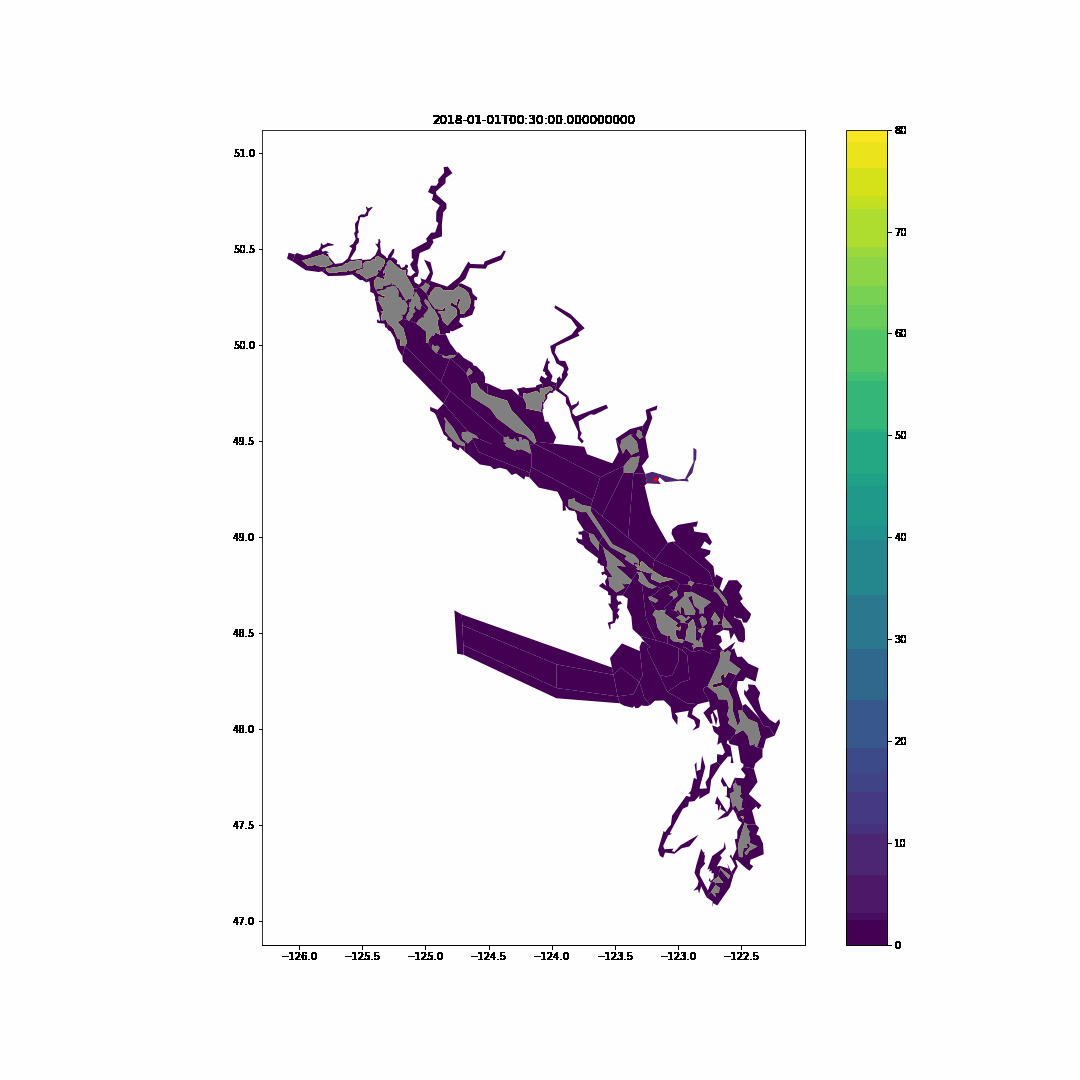

In [12]:
from IPython.display import Image
Image(filename='Oil_Scenario_6a_2018.gif') 

In [13]:
file_name_str = ' '.join(file_names)
os.system('rm ' + file_name_str)

0

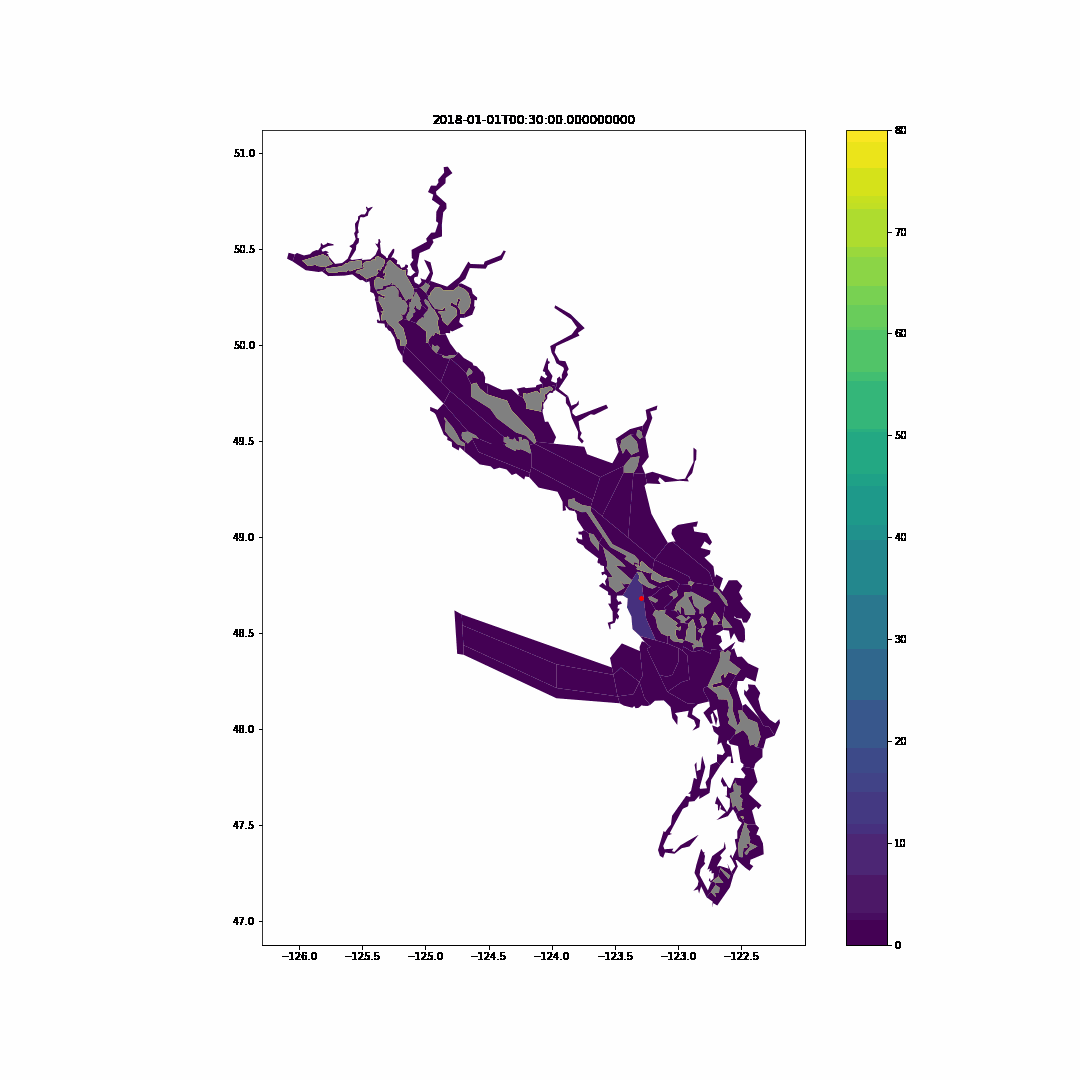

In [15]:
Image(filename='results/Oil_Scenario_5b_2018_wWind.gif')

In [4]:
from IPython.display import HTML
IMG_TAG = '<img src="Oil_Scenario_6a_VancouverHarbour_BunkerC2019-07-07.gif">'

def display_animation(anim):
    plt.close(anim)
    return HTML(anim_to_gif(anim))

def anim_to_gif(anim):
    data=[0]
    #with data = open(amin.name)
     #    data = data.encode('base64')
    return IMG_TAG.format(data)


anim = 'Oil_Scenario_6a_VancouverHarbour_BunkerC2019-07-07.gif'
display_animation(anim)